In [89]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data as pdr
import yfinance as yf
import pingouin as pg

### Construct a 6-asset portfolio

In [90]:
assets = ['CAT', 'CB', 'HD', 'MSFT', 'V', 'NVDA']
pf_data = pd.DataFrame()
yf.pdr_override()

In [91]:
#collect daily stock price data for the last 5 years
for x in assets :
    pf_data[x] = pdr.get_data_yahoo(x, start='2019-3-05', end='2024-3-07')['Adj Close']

C:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd

### Visualizing the value of $1 over time

<Axes: xlabel='Date'>

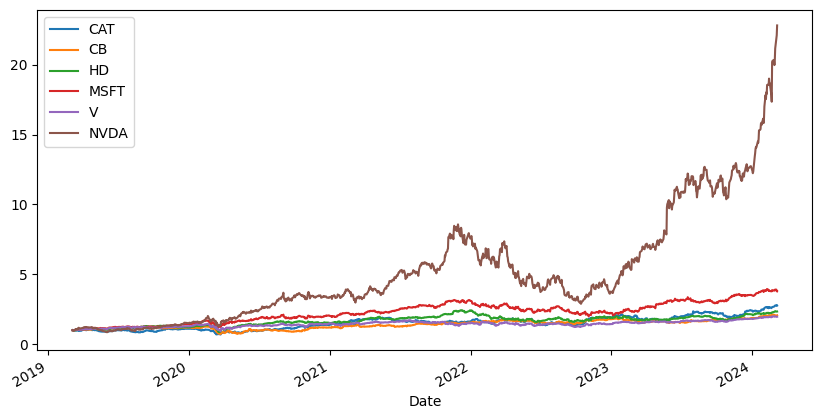

In [92]:
(pf_data/pf_data.iloc[0]).plot(figsize=(10, 5))

In [93]:
#calculate returns
returns = pf_data.pct_change()

### Calculate Correlation and Level of Significance

In [94]:
returns.rcorr(stars=False, decimals=6)

C:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:1118: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(lambda x: ffp(x, precision=decimals))


CAT        CB        HD      MSFT         V      NVDA
CAT          -  0.000000  0.000000  0.000000  0.000000  0.000000
CB    0.495539         -  0.000000  0.000000  0.000000  0.000000
HD     0.44837   0.47725         -  0.000000  0.000000  0.000000
MSFT  0.359293  0.375976   0.60275         -  0.000000  0.000000
V     0.497243  0.555339  0.570857  0.640785         -  0.000000
NVDA  0.353007  0.246373  0.508676  0.707306  0.525417         -

### Construct the efficient frontier

In [95]:
#create random weights for the portfolio
portfolio_returns = []
portfolio_volatilities = []
portfolio_weights = []

for x in range(10000) :
    while True :
        weights = np.random.random(len(assets))
        weights /= np.sum(weights)
        if np.all(weights >= 0.02) :
            break
    portfolio_weights.append(weights)
    portfolio_returns.append(np.sum(weights*returns.mean()*252))
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights))))

portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

In [96]:
data = {'Return': portfolio_returns, 'Volatility': portfolio_volatilities}
for counter, symbol in enumerate(returns.columns.tolist()) :
    data[symbol + '_weight'] = [w[counter] for w in portfolio_weights]
portfolios = pd.DataFrame(data)

### Plot the EF

Text(0, 0.5, 'Exp Return')

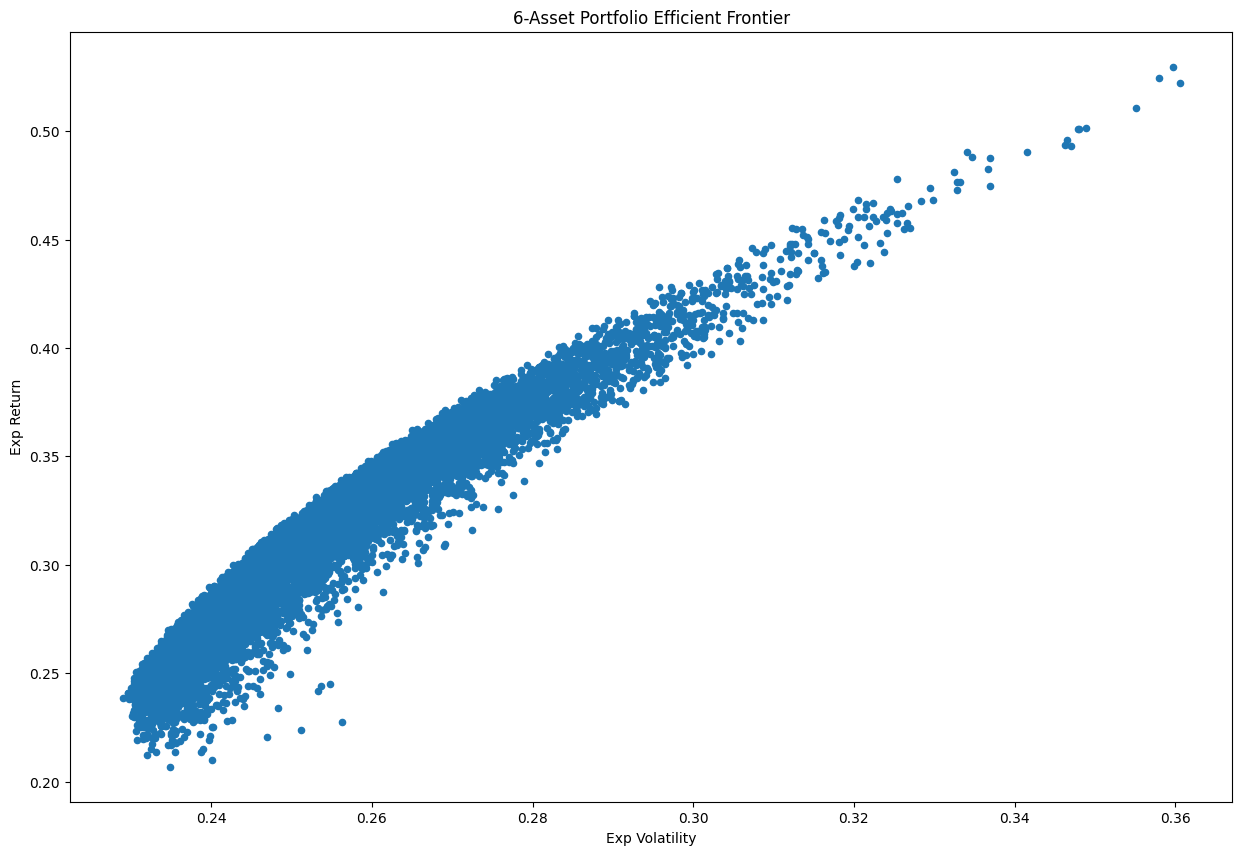

In [97]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(15, 10));
plt.title('6-Asset Portfolio Efficient Frontier')
plt.xlabel('Exp Volatility')
plt.ylabel('Exp Return')

### Calculate Sharpe ratio for each portfolio

In [98]:
#allow the user to input the risk-free rate
rf = float(input("Please enter the risk-free rate (as a decimal): "))
#calculate the sharpe ratio for each portfolio
portfolios['Sharpe'] = (portfolios['Return'] - rf) / portfolios['Volatility']
portfolios.sort_values(by=['Sharpe'])

Please enter the risk-free rate (as a decimal):  0.01


Return  Volatility  CAT_weight  CB_weight  HD_weight  MSFT_weight  \
1888  0.209908    0.240102    0.031822   0.352514   0.094152     0.023149   
8895  0.206864    0.234929    0.089686   0.212593   0.222843     0.021778   
7889  0.227352    0.256253    0.061077   0.105423   0.020927     0.065849   
5067  0.223575    0.251120    0.024253   0.081923   0.643566     0.022514   
8885  0.220361    0.246993    0.051858   0.665791   0.173159     0.032813   
...        ...         ...         ...        ...        ...          ...   
5397  0.468356    0.320543    0.130599   0.207505   0.027950     0.096473   
6220  0.524659    0.358003    0.156169   0.037371   0.128914     0.078991   
2238  0.490355    0.334101    0.312372   0.052803   0.052939     0.078918   
3243  0.477973    0.325326    0.068359   0.318962   0.046119     0.024557   
4931  0.529685    0.359754    0.064198   0.167893   0.024044     0.086035   

      V_weight  NVDA_weight    Sharpe  
1888  0.459592     0.038770  0.832596  
8895  0.432461     0.020640  0.837972  
7889  0.682354     0.064369  0.848192  
5067  0.193612     0.034132  0.850489  
8885  0.036594     0.039785  0.851689  
...        ...          ...       ...  
5397  0.080774     0.456700  1.429939  
6220  0.047820     0.550734  1.437583  
2238  0.028092     0.474876  1.437755  
3243  0.046706     0.495296  1.438475  
4931  0.083488     0.574343  1.444558  

[10000 rows x 9 columns]

In [99]:
#report to the user minimum and maximum sharpe ratio
print("Minimum Sharpe Ratio: " + str(portfolios["Sharpe"].min()))
print("Maximum Sharpe Ratio: " + str(portfolios["Sharpe"].max()))

Minimum Sharpe Ratio: 0.8325964391381143
Maximum Sharpe Ratio: 1.4445581939686405


### Find the minimum variance portfolio

In [100]:
min_vol = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_vol

Return         0.238717
Volatility     0.228992
CAT_weight     0.161404
CB_weight      0.285887
HD_weight      0.207535
MSFT_weight    0.207617
V_weight       0.117111
NVDA_weight    0.020447
Sharpe         0.998801
Name: 1394, dtype: float64

### Find the maximum variance portfolio

In [101]:
max_vol = portfolios.iloc[portfolios['Volatility'].idxmax()]
max_vol

Return         0.522269
Volatility     0.360544
CAT_weight     0.047889
CB_weight      0.069367
HD_weight      0.082142
MSFT_weight    0.211016
V_weight       0.056855
NVDA_weight    0.532732
Sharpe         1.420821
Name: 6499, dtype: float64

### Find the optimal risky portfolio

In [102]:
optimal_risky = portfolios.iloc[((portfolios['Return']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky

Return         0.529685
Volatility     0.359754
CAT_weight     0.064198
CB_weight      0.167893
HD_weight      0.024044
MSFT_weight    0.086035
V_weight       0.083488
NVDA_weight    0.574343
Sharpe         1.444558
Name: 4931, dtype: float64

### Plot the Ef w Min Var, Max Var, and Optimal Risky indicated

C:\Users\aless\AppData\Local\Temp\ipykernel_20820\2905166500.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_vol[1], min_vol[0], color='blue', marker='*', s=200)
C:\Users\aless\AppData\Local\Temp\ipykernel_20820\2905166500.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(max_vol[1], max_vol[0], color='red', marker='*', s=200)
C:\Users\aless\AppData\Local\Temp\ipykernel_20820\2905166500.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

Text(0, 0.5, 'Exp Return')

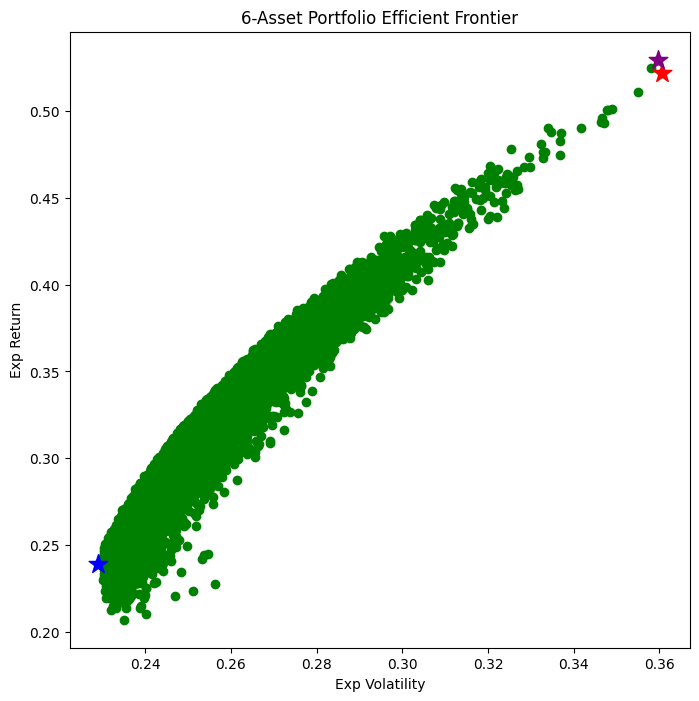

In [103]:
plt.subplots(figsize=(8, 8))
plt.scatter(portfolios['Volatility'], portfolios['Return'], marker='o', color='green');
plt.scatter(min_vol[1], min_vol[0], color='blue', marker='*', s=200)
plt.scatter(max_vol[1], max_vol[0], color='red', marker='*', s=200)
plt.scatter(optimal_risky[1], optimal_risky[0], color='purple', marker='*', s=200)
plt.title('6-Asset Portfolio Efficient Frontier')
plt.xlabel('Exp Volatility')
plt.ylabel('Exp Return')

In [104]:
#extract the weights from the minimum variance portfolio
min_vol.iloc[2]+min_vol.iloc[3]+min_vol.iloc[4]+min_vol.iloc[5]+min_vol.iloc[6]+min_vol.iloc[7]

1.0

In [105]:
#create an array of the weights
weights = np.array([min_vol.iloc[2],min_vol.iloc[3],min_vol.iloc[4],min_vol.iloc[5],min_vol.iloc[6],min_vol.iloc[7]])

### Calculate the VAR

In [106]:
#set initial investment
initial_investment = float(input("Please define the initial investment in the portfolio: "))
#calculate returns for each stock
avg_ret = returns.mean()
#calculate portfolio avg returns
port_mean = avg_ret.dot(weights)
#calculate the std dev of portfolio
port_stdev = np.sqrt(weights.T.dot(returns.cov()).dot(weights))
#mean investment
mean_investment = (1 + port_mean) * initial_investment
#calculate the std dev of investment
stdev_investment = initial_investment * port_stdev

Please define the initial investment in the portfolio:  50000


In [107]:
#define the confidence level
conf_level = 0.05

In [108]:
#calculate the 1-day VAR
cutoff = norm.ppf(conf_level, mean_investment, stdev_investment)
var_1d = initial_investment - cutoff
var_1d

1138.9953586001066

### Calculate 90-day VAR

In [109]:
var_array = []
num_days = 90
for x in range(1, num_days+1) :
    var_array.append(np.round(var_1d * np.sqrt(x), 2))

### Plot the 90-day VAR across the first 30 days

Text(0.5, 1.0, '90-day Max Portfolio Loss (VAR) across first 30 days')

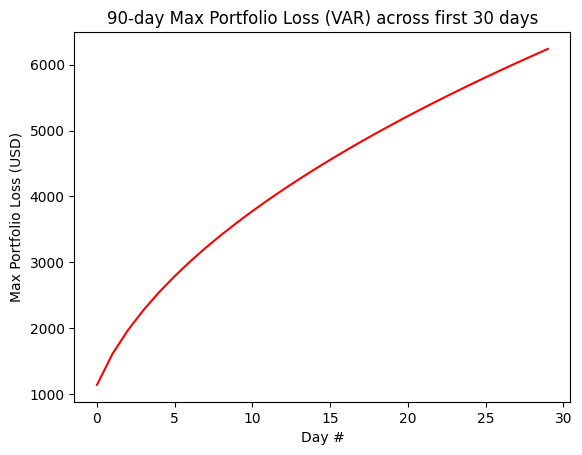

In [110]:
plt.plot(var_array[:30], "r")
plt.xlabel("Day #")
plt.ylabel("Max Portfolio Loss (USD)")
plt.title("90-day Max Portfolio Loss (VAR) across first 30 days")